<a href="https://colab.research.google.com/github/AshfakMRM/CNN_Model/blob/master/disease_detection_new_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

In [2]:
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

In [3]:
IMAGE_SIZE = [224, 224]

train_path = '/content/drive/MyDrive/Dataset/train'
valid_path = '/content/drive/MyDrive/Dataset/test'

In [4]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.5))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.25))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(8, activation='relu'))
model.add(layers.Dense(2, activation='softmax'))

In [5]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 111, 111, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 109, 109, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 54, 54, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 52, 52, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 26, 26, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 26, 26, 64)        0

In [6]:
model.compile(
  loss='categorical_crossentropy',
  optimizer='sgd',
  metrics=['accuracy']
)

In [7]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [8]:
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/Dataset/train',
                                                 target_size = (224, 224),
                                                 batch_size = 16,
                                                 class_mode = 'categorical')

Found 2122 images belonging to 2 classes.


In [12]:
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/Dataset/test',
                                            target_size = (224, 224),
                                            batch_size = 16,
                                            class_mode = 'categorical')

Found 352 images belonging to 2 classes.


In [13]:
from keras import callbacks
earlystopping = callbacks.EarlyStopping(monitor ="loss", 
                                        mode ="min", patience = 5, 
                                        restore_best_weights = True)

In [14]:
history = model.fit(training_set, epochs=100, 
                    validation_data=test_set, steps_per_epoch=len(training_set),
  validation_steps=len(test_set), callbacks =[earlystopping])

Epoch 1/100
133/133 [==============================] - 662s 5s/step - loss: 0.6821 - accuracy: 0.5910 - val_loss: 0.6772 - val_accuracy: 0.5966
Epoch 2/100
133/133 [==============================] - 209s 2s/step - loss: 0.6751 - accuracy: 0.5975 - val_loss: 0.6748 - val_accuracy: 0.5966
Epoch 3/100
133/133 [==============================] - 209s 2s/step - loss: 0.6734 - accuracy: 0.5975 - val_loss: 0.6737 - val_accuracy: 0.5966
Epoch 4/100
133/133 [==============================] - 209s 2s/step - loss: 0.6736 - accuracy: 0.5975 - val_loss: 0.6736 - val_accuracy: 0.5966
Epoch 5/100
133/133 [==============================] - 210s 2s/step - loss: 0.6718 - accuracy: 0.5975 - val_loss: 0.6728 - val_accuracy: 0.5966
Epoch 6/100
133/133 [==============================] - 211s 2s/step - loss: 0.6700 - accuracy: 0.5975 - val_loss: 0.6691 - val_accuracy: 0.5966
Epoch 7/100
133/133 [==============================] - 213s 2s/step - loss: 0.6670 - accuracy: 0.5971 - val_loss: 0.6580 - val_accuracy:

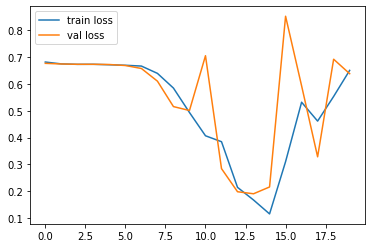

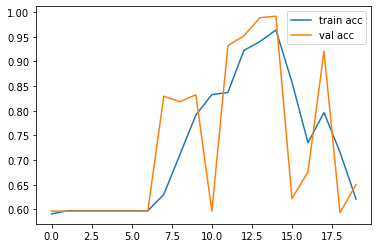

<Figure size 432x288 with 0 Axes>

In [15]:
import matplotlib.pyplot as plt
# plot the loss
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [16]:
from tensorflow.keras.models import load_model

model.save('model_own2.h5')